In [1]:
import numpy as np
import pandas as pd


In [4]:
x = pd.Series([1, 2, 3, 4, 5])
x

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [5]:
x+100

0    101
1    102
2    103
3    104
4    105
dtype: int64

In [8]:
(x ** 2) * 100

0     100
1     400
2     900
3    1600
4    2500
dtype: int64

In [7]:
x > 2

0    False
1    False
2     True
3     True
4     True
dtype: bool

In [9]:
larger_than_2 = x > 2

In [10]:
larger_than_2.any()

True

In [12]:
larger_than_2.all()

False

In [13]:
larger_than_2.argmax()

2

In [21]:
def f(x): 
    if x % 2 == 0:
        return x * 2
    else:
        return x * 3

x.apply(f)

0     3
1     4
2     9
3     8
4    15
dtype: int64

In [23]:
%%timeit

ds = pd.Series(range(1000))

for counter in range(len(ds)):
    ds[counter] = f(ds[counter])

100 loops, best of 3: 15.4 ms per loop


# Wow much faster

In [24]:
%%timeit

ds = pd.Series(range(1000))
ds = ds.apply(f)

1000 loops, best of 3: 826 µs per loop


these objects are refrence objects, so you have to do y = x.copy() to not overite x when changing a value in y

In [30]:
x.describe()

count    5.000000
mean     3.000000
std      1.581139
min      1.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      5.000000
dtype: float64

In [39]:
y = pd.Series(np.random.random(100) * 1000)
y.describe()

count    100.000000
mean     473.109034
std      274.685134
min       19.908879
25%      253.006726
50%      509.421654
75%      708.813752
max      988.365501
dtype: float64

In [99]:
import matplotlib.pyplot as plt

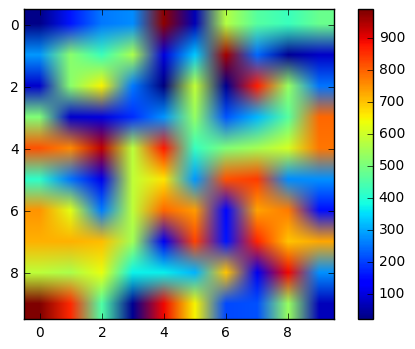

In [74]:
new = np.reshape(np.array(y.tolist()), (10,10))
plt.imshow(new)
plt.colorbar()
plt.show()

In [81]:
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
df = pd.DataFrame(data, columns=["x"])

In [76]:
df

,x
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [82]:
df['x squared'] = df['x'] ** 2

In [83]:
df

,x,x squared
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25
5,6,36
6,7,49
7,8,64
8,9,81
9,10,100


In [84]:
df['is even'] = df['x'] % 2 == 0

In [85]:
df['ood even'] = df['is even'].map({False:"odd", True:"even"})

In [86]:
df

,x,x squared,is even,ood even
0,1,1,False,odd
1,2,4,True,even
2,3,9,False,odd
3,4,16,True,even
4,5,25,False,odd
5,6,36,True,even
6,7,49,False,odd
7,8,64,True,even
8,9,81,False,odd
9,10,100,True,even


In [88]:
cf = df.drop("is even", 1)

In [89]:
cf

,x,x squared,ood even
0,1,1,odd
1,2,4,even
2,3,9,odd
3,4,16,even
4,5,25,odd
5,6,36,even
6,7,49,odd
7,8,64,even
8,9,81,odd
9,10,100,even


In [90]:
df

,x,x squared,is even,ood even
0,1,1,False,odd
1,2,4,True,even
2,3,9,False,odd
3,4,16,True,even
4,5,25,False,odd
5,6,36,True,even
6,7,49,False,odd
7,8,64,True,even
8,9,81,False,odd
9,10,100,True,even


In [91]:
df[['x', 'is even']]

,x,is even
0,1,False
1,2,True
2,3,False
3,4,True
4,5,False
5,6,True
6,7,False
7,8,True
8,9,False
9,10,True


In [92]:
df[df['is even'] == False]

,x,x squared,is even,ood even
0,1,1,False,odd
2,3,9,False,odd
4,5,25,False,odd
6,7,49,False,odd
8,9,81,False,odd


In [94]:
df[(df['is even'] == False) | (df['x squared'] > 25)]

,x,x squared,is even,ood even
0,1,1,False,odd
2,3,9,False,odd
4,5,25,False,odd
5,6,36,True,even
6,7,49,False,odd
7,8,64,True,even
8,9,81,False,odd
9,10,100,True,even


In [95]:
df[(df['is even'] == False) & (df['x squared'] > 25)]

,x,x squared,is even,ood even
6,7,49,False,odd
8,9,81,False,odd


In [101]:
df.describe()

,x,x squared
count,10.00000,10.000000
mean,5.50000,38.500000
std,3.02765,34.173577
min,1.00000,1.000000
25%,3.25000,10.750000
50%,5.50000,30.500000
75%,7.75000,60.250000
max,10.00000,100.000000
